In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
    

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('student-por.csv')




**EDA**
Target => G3

In [176]:
dataset.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [177]:
dataset.shape

(649, 33)

In [178]:
dataset.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [179]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<AxesSubplot:xlabel='G1', ylabel='Count'>

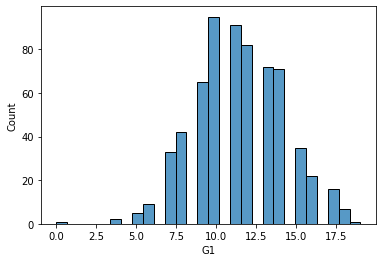

In [180]:
sns.histplot(dataset["G1"])


<AxesSubplot:xlabel='G2', ylabel='Count'>

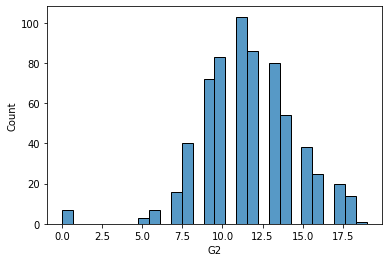

In [181]:
sns.histplot(dataset["G2"])


<AxesSubplot:xlabel='G3', ylabel='Count'>

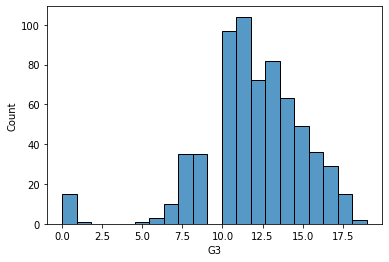

In [182]:
sns.histplot(dataset["G3"])

<AxesSubplot:>

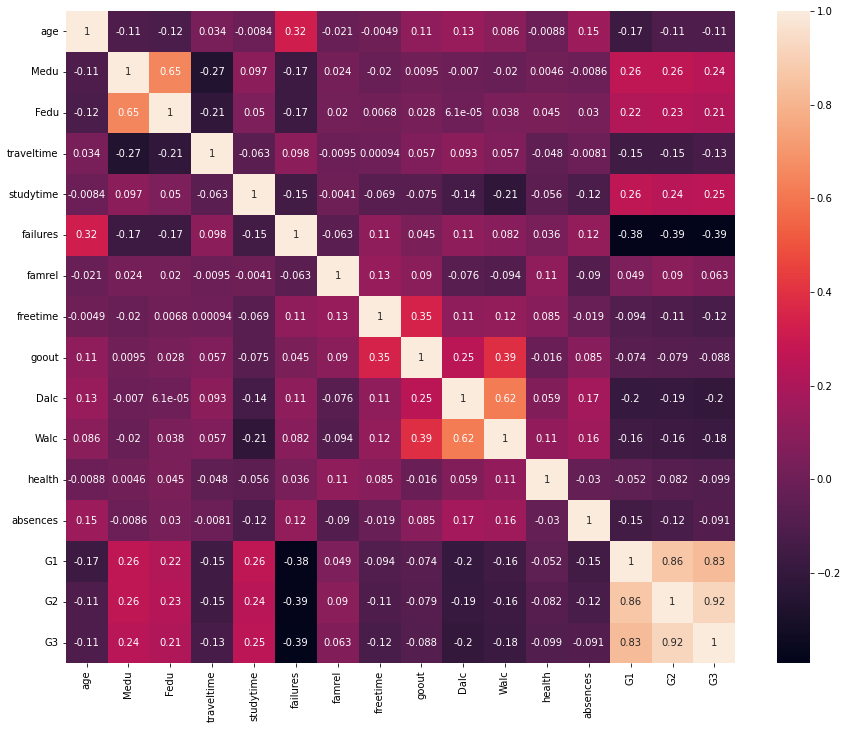

In [183]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True)

**Preprocessing** 

In [184]:
#Drop low correlation columns 
dataset = dataset.drop(columns=["health","absences","goout"])

In [185]:
categoricals = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","internet","higher","romantic"]
gd = pd.get_dummies(dataset,columns=categoricals)
gd.head()
gd.columns.values

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'Dalc', 'Walc', 'G1', 'G2', 'G3',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'internet_no', 'internet_yes',
       'higher_no', 'higher_yes', 'romantic_no', 'romantic_yes'],
      dtype=object)

In [186]:
gd.columns.values
gd = gd.drop(['nursery_no','paid_no','famsup_no','internet_no','romantic_no','higher_no','sex_F','school_MS','activities_no','schoolsup_no','address_U','famsize_LE3','Pstatus_T'], axis='columns')
dataset = gd
dataset.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'Dalc', 'Walc', 'G1', 'G2', 'G3', 'school_GP', 'sex_M',
       'address_R', 'famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes',
       'internet_yes', 'higher_yes', 'romantic_yes'],
      dtype='object')

<AxesSubplot:>

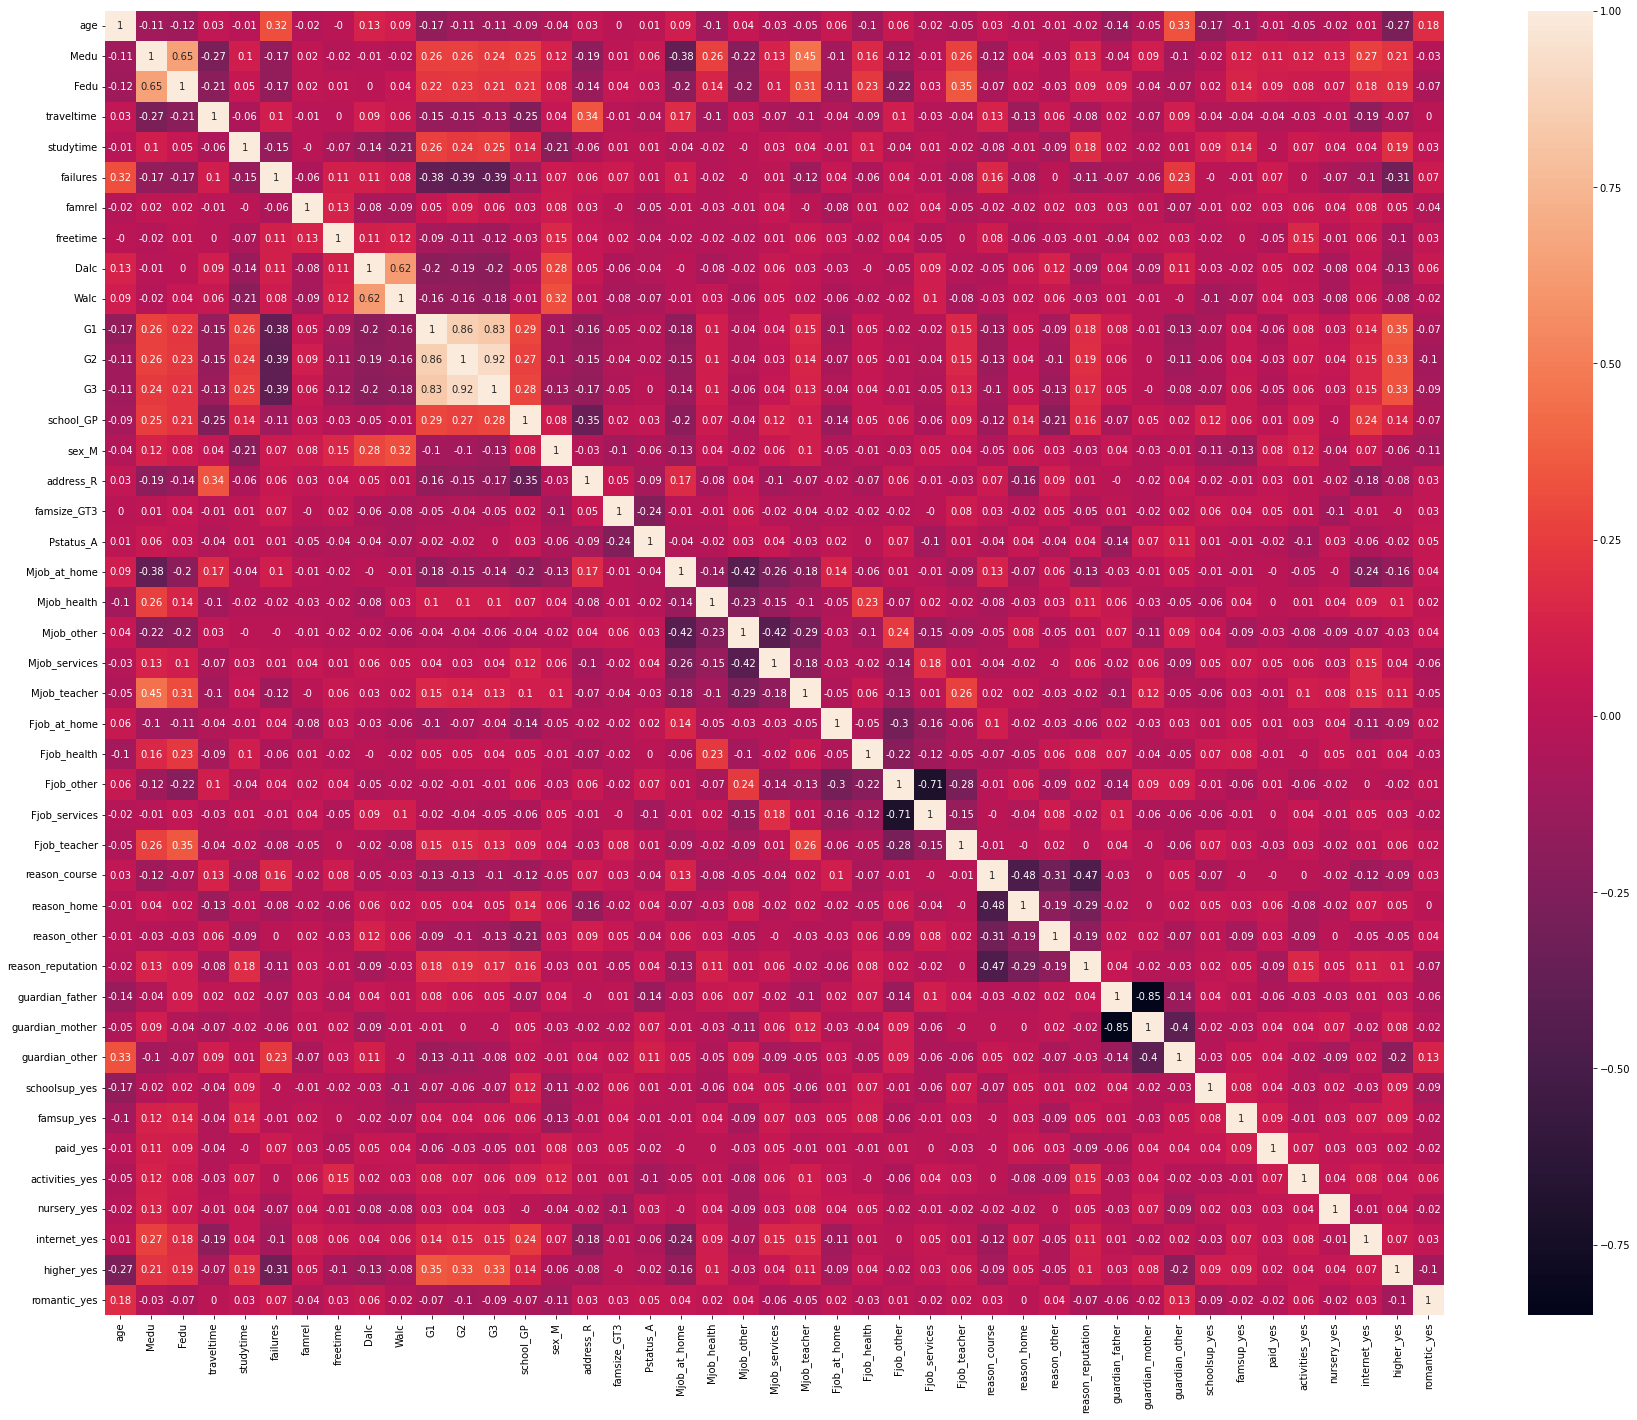

In [190]:

plt.figure(figsize=(30,24))
sns.heatmap(dataset.corr().round(2), annot=True)

In [201]:
#Get high correlation columns

x = dataset[["age","Medu","Fedu","traveltime","studytime","failures","freetime","Dalc","Walc","G1","G2","school_GP","address_R","Mjob_at_home","Mjob_health","Mjob_teacher","Fjob_teacher","reason_course","reason_other","reason_reputation","internet_yes","higher_yes","sex_M"]]
y = dataset["G3"]

**MODEL**

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [218]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.908558702879345